In [1]:
import pandas as pd
import numpy as np
import missingno
import fuzzywuzzy
from fuzzywuzzy import process
import collections
import matplotlib.pyplot as plt

c:\python\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
nike = pd.read_csv(r'C:\Users\saman\Desktop\nike vs adidas\nike_2020_04_13.csv')

In [3]:
nike.head()

,URL,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
0,https://www.nike.com/in/t/air-force-1-07-essen...,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:56
1,https://www.nike.com/in/t/air-force-1-07-shoe-...,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:56
2,https://www.nike.com/in/t/air-force-1-sage-low...,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:56
3,https://www.nike.com/in/t/air-max-dia-se-shoe-...,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:57
4,https://www.nike.com/in/t/air-max-verona-shoe-...,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:57


In [4]:
nike.drop(columns=['URL'])

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
0,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:56
1,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:56
2,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:56
3,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:57
4,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:57
...,...,...,...,...,...,...,...,...,...,...,...
638,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:41:01
639,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,NaN,2020-04-13T15:41:03
640,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,NaN,2020-04-13T15:41:07
641,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:41:19


In [5]:
Nik = nike.drop(columns=['URL'])

In [6]:
Nik.isnull()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
638,False,False,False,False,False,False,False,False,False,False,False
639,False,False,False,False,False,False,False,False,False,True,False
640,False,False,False,False,False,False,False,False,False,True,False
641,False,False,False,False,False,False,False,False,False,False,False


In [7]:
for col in Nik.columns:
    pct_missing = Nik[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

Product Name - 0.0%
Product ID - 0.0%
Listing Price - 0.0%
Sale Price - 0.0%
Discount - 0.0%
Brand - 0.0%
Description - 0.5%
Rating - 0.0%
Reviews - 0.0%
Images - 11.0%
Last Visited - 0.0%


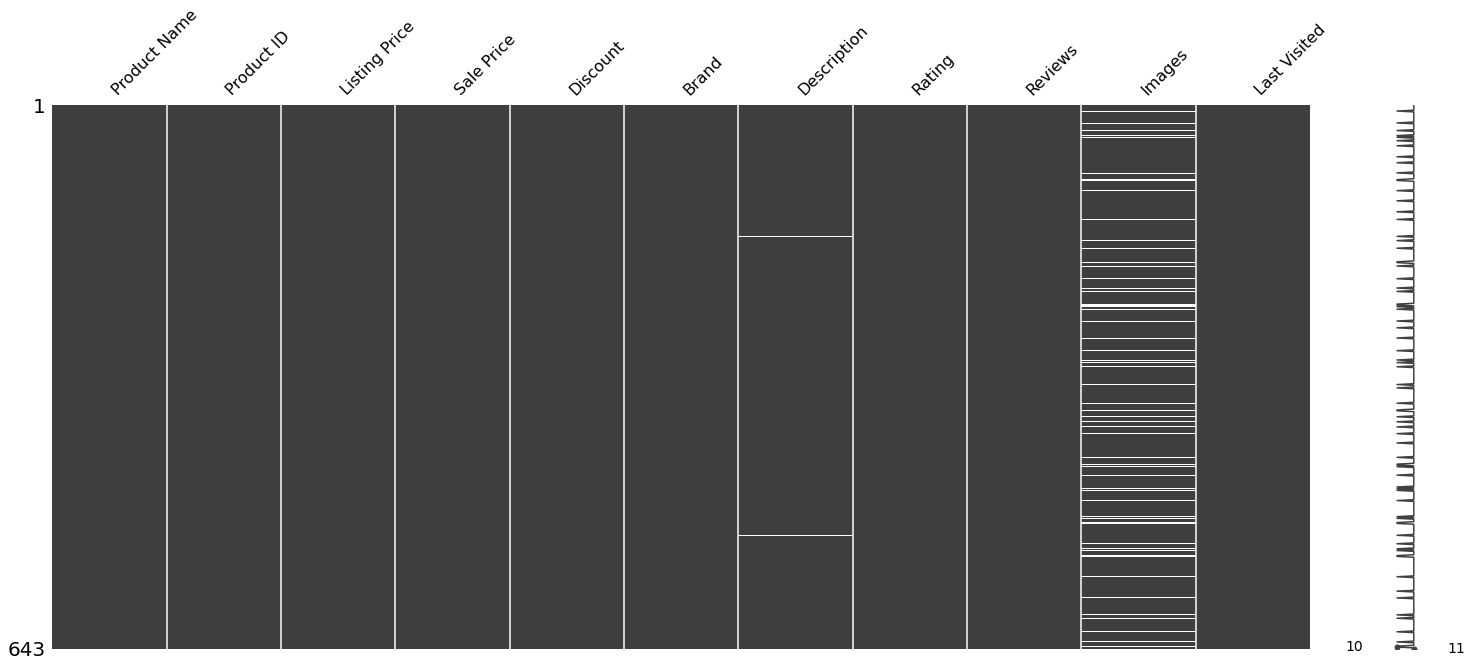

In [8]:
missingno.matrix(Nik, fontsize = 16)
plt.show()

In [9]:
mod_Nik = Nik.dropna()
print("Modified Nik : ")
print(mod_Nik)

Modified Nik : 
                       Product Name  Product ID  Listing Price  Sale Price  \
0    Nike Air Force 1 '07 Essential  CJ1646-600              0        7495   
1              Nike Air Force 1 '07  CT4328-101              0        7495   
2      Nike Air Force 1 Sage Low LX  CI3482-200              0        9995   
3               Nike Air Max Dia SE  CD0479-200              0        9995   
4               Nike Air Max Verona  CZ6156-101              0        9995   
..                              ...         ...            ...         ...   
636         Kyrie 6 'Enlightenment'  BQ4630-500          10995        8797   
637           Nike React Metcon AMP  CT9155-063              0       13995   
638              Air Jordan 8 Retro  CI1236-100          15995       12797   
641                 Nike Air Max 98  AH6799-300              0       16995   
642                  Nike P-6000 SE  CJ9585-600           8995        6297   

     Discount Brand                            

In [10]:
print(mod_Nik)

                       Product Name  Product ID  Listing Price  Sale Price  \
0    Nike Air Force 1 '07 Essential  CJ1646-600              0        7495   
1              Nike Air Force 1 '07  CT4328-101              0        7495   
2      Nike Air Force 1 Sage Low LX  CI3482-200              0        9995   
3               Nike Air Max Dia SE  CD0479-200              0        9995   
4               Nike Air Max Verona  CZ6156-101              0        9995   
..                              ...         ...            ...         ...   
636         Kyrie 6 'Enlightenment'  BQ4630-500          10995        8797   
637           Nike React Metcon AMP  CT9155-063              0       13995   
638              Air Jordan 8 Retro  CI1236-100          15995       12797   
641                 Nike Air Max 98  AH6799-300              0       16995   
642                  Nike P-6000 SE  CJ9585-600           8995        6297   

     Discount Brand                                        Desc

In [11]:
for col in mod_Nik.columns:
    pct_missing = mod_Nik[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

Product Name - 0.0%
Product ID - 0.0%
Listing Price - 0.0%
Sale Price - 0.0%
Discount - 0.0%
Brand - 0.0%
Description - 0.0%
Rating - 0.0%
Reviews - 0.0%
Images - 0.0%
Last Visited - 0.0%


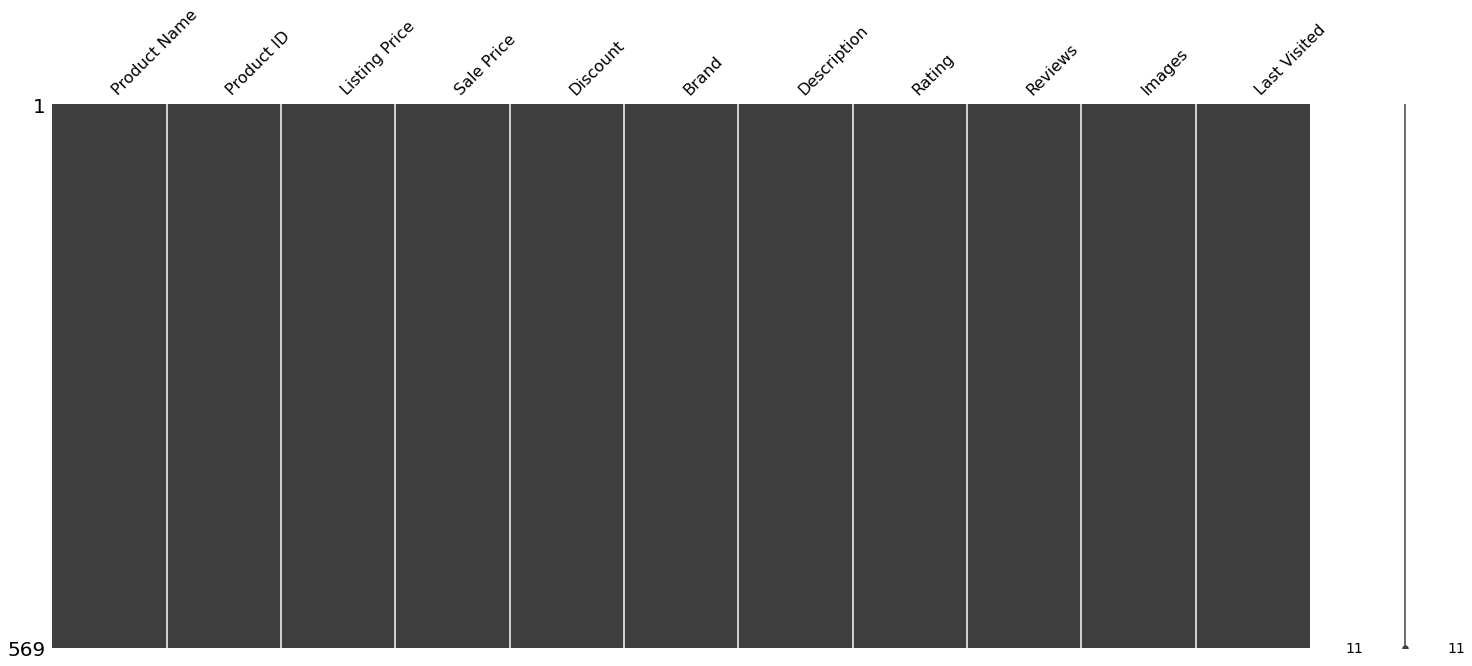

In [12]:
missingno.matrix(mod_Nik, fontsize = 16)
plt.show()

In [13]:
mod_Nik.head(10)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
0,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:56
1,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:56
2,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:56
3,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:57
4,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:57
5,Nike Free Metcon 3,CJ6314-146,0,9995,0,Nike,The Nike Free Metcon 3 combines the flexibilit...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:58
6,NikeCourt Blanc,CI0808-100,0,5995,0,Nike,"Inspired by heritage models, the NikeCourt Bla...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:58
8,Nike Zoom Pegasus Turbo 2,AT8242-009,0,15995,0,Nike,The Nike Zoom Pegasus Turbo 2 is updated with ...,2.7,14,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:59
9,Nike Air Max 270 React ENG,CK2595-500,0,14995,0,Nike,The Nike Air Max 270 React ENG combines a full...,5.0,2,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:59
10,Nike Air Max 90,CD0490-104,0,9995,0,Nike,"Clean lines, versatile and timeless—the people...",5.0,9,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:28:00


In [14]:
mod_Nik.shape

(569, 11)

In [15]:
col_name_without_numeric_data = list(mod_Nik.select_dtypes(exclude=('int', 'float')).columns)
print(f'Сolumns without numeric data: {", ".join(col_name_without_numeric_data)}.')

Сolumns without numeric data: Product Name, Product ID, Listing Price, Sale Price, Discount, Brand, Description, Reviews, Images, Last Visited.


In [16]:
for col in col_name_without_numeric_data:
    if mod_Nik[col].duplicated().any() == True:
        print (f'Column {col} contains duplicates.')
    else:
        print (f'Column {col} does not contain duplicates.')

Column Product Name contains duplicates.
Column Product ID contains duplicates.
Column Listing Price contains duplicates.
Column Sale Price contains duplicates.
Column Discount contains duplicates.
Column Brand contains duplicates.
Column Description contains duplicates.
Column Reviews contains duplicates.
Column Images contains duplicates.
Column Last Visited contains duplicates.


In [17]:
sorted = mod_Nik.sort_values('Sale Price', ascending=False)

In [18]:
sorted.head(20)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
523,Nike Air VaporMax Flyknit 2 LXX,AT5673-700,0,36500,0,Nike,The Nike Air VaporMax Flyknit 2 LXX places you...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:36:42
539,Nike Mercurial Superfly 7 Elite MDS FG,BQ5469-703,0,24995,0,Nike,Dream of speed and play fast in the Nike Mercu...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:36:47
306,Nike Mercurial Superfly 7 Elite MDS FG,BQ5469-703,0,24995,0,Nike,Dream of speed and play fast in the Nike Mercu...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:32:30
466,Nike Mercurial Superfly 7 Elite FG,AQ4174-049,0,22995,0,Nike,"Building on the 360 innovation of the 6, the N...",4.3,8,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:34:52
272,Nike Phantom Vision 2 Elite Dynamic Fit FG,CD4161-606,0,22995,0,Nike,The Nike Phantom Vision 2 Elite Dynamic Fit FG...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:32:21
613,Nike Mercurial Superfly 7 Elite FG,AQ4174-049,0,22995,0,Nike,"Building on the 360 innovation of the 6, the N...",4.3,8,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:38:45
49,Nike Mercurial Vapor 13 Elite Neymar Jr. FG,AT7898-104,0,22995,0,Nike,"Building on the 360 innovation of the 12, the ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:28:12
432,Nike Phantom Vision 2 Elite Dynamic Fit FG,CD4161-606,0,22995,0,Nike,The Nike Phantom Vision 2 Elite Dynamic Fit FG...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:34:30
237,Nike Mercurial Vapor 13 Elite Neymar Jr. FG,AT7898-104,0,22995,0,Nike,"Building on the 360 innovation of the 12, the ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:30:39
605,Nike Mercurial Vapor 13 Elite FG,AQ4176-049,0,21995,0,Nike,Building on the 360-degree Flyknit innovation ...,3.5,4,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:38:43


In [19]:
print(sorted)

                                   Product Name  Product ID  Listing Price  \
523             Nike Air VaporMax Flyknit 2 LXX  AT5673-700              0   
539      Nike Mercurial Superfly 7 Elite MDS FG  BQ5469-703              0   
306      Nike Mercurial Superfly 7 Elite MDS FG  BQ5469-703              0   
466          Nike Mercurial Superfly 7 Elite FG  AQ4174-049              0   
272  Nike Phantom Vision 2 Elite Dynamic Fit FG  CD4161-606              0   
..                                          ...         ...            ...   
28                                Nike Offcourt  BQ4632-602              0   
305                         Nike Benassi JDI SE  CK0986-002           2995   
234                              Nike Bella Kai  AO3622-006              0   
402                            Nike Kawa Shower  832655-001              0   
154                            Nike Kawa Shower  832528-001              0   

     Sale Price  Discount Brand  \
523       36500         0  N

In [20]:
sorted.head(2)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
523,Nike Air VaporMax Flyknit 2 LXX,AT5673-700,0,36500,0,Nike,The Nike Air VaporMax Flyknit 2 LXX places you...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:36:42
539,Nike Mercurial Superfly 7 Elite MDS FG,BQ5469-703,0,24995,0,Nike,Dream of speed and play fast in the Nike Mercu...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:36:47


In [21]:
sorted.tail(2)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
402,Nike Kawa Shower,832655-001,0,1595,0,Nike,The Nike Kawa Shower Women's Slide is ideal fo...,0.0,0,"[""https://c.static-nike.com/a/images/t_PDP_172...",2020-04-13T15:32:46
154,Nike Kawa Shower,832528-001,0,1595,0,Nike,The Nike Kawa Shower Men's Slide is designed t...,4.5,6,"[""https://c.static-nike.com/a/images/t_PDP_172...",2020-04-13T15:30:14


In [22]:
sorted.head(10)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
523,Nike Air VaporMax Flyknit 2 LXX,AT5673-700,0,36500,0,Nike,The Nike Air VaporMax Flyknit 2 LXX places you...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:36:42
539,Nike Mercurial Superfly 7 Elite MDS FG,BQ5469-703,0,24995,0,Nike,Dream of speed and play fast in the Nike Mercu...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:36:47
306,Nike Mercurial Superfly 7 Elite MDS FG,BQ5469-703,0,24995,0,Nike,Dream of speed and play fast in the Nike Mercu...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:32:30
466,Nike Mercurial Superfly 7 Elite FG,AQ4174-049,0,22995,0,Nike,"Building on the 360 innovation of the 6, the N...",4.3,8,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:34:52
272,Nike Phantom Vision 2 Elite Dynamic Fit FG,CD4161-606,0,22995,0,Nike,The Nike Phantom Vision 2 Elite Dynamic Fit FG...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:32:21
613,Nike Mercurial Superfly 7 Elite FG,AQ4174-049,0,22995,0,Nike,"Building on the 360 innovation of the 6, the N...",4.3,8,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:38:45
49,Nike Mercurial Vapor 13 Elite Neymar Jr. FG,AT7898-104,0,22995,0,Nike,"Building on the 360 innovation of the 12, the ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:28:12
432,Nike Phantom Vision 2 Elite Dynamic Fit FG,CD4161-606,0,22995,0,Nike,The Nike Phantom Vision 2 Elite Dynamic Fit FG...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:34:30
237,Nike Mercurial Vapor 13 Elite Neymar Jr. FG,AT7898-104,0,22995,0,Nike,"Building on the 360 innovation of the 12, the ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:30:39
605,Nike Mercurial Vapor 13 Elite FG,AQ4176-049,0,21995,0,Nike,Building on the 360-degree Flyknit innovation ...,3.5,4,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:38:43


In [23]:
range_1 = sorted[(sorted['Sale Price'] <= 5000)]

In [24]:
range_1.count()

Product Name     42
Product ID       42
Listing Price    42
Sale Price       42
Discount         42
Brand            42
Description      42
Rating           42
Reviews          42
Images           42
Last Visited     42
dtype: int64

In [25]:
range_1.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
319,NikeCourt Lite 2,AR8836-009,0,4995,0,Nike,The NikeCourt Lite 2 is designed to cushion an...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:32:34
307,Nike Mercurial Vapor 13 Club IC,AT7997-606,0,4995,0,Nike,The Nike Mercurial Vapor 13 Club IC is made fo...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:32:30
57,Nike Mercurial Vapor 13 Club IC,AT7997-606,0,4995,0,Nike,The Nike Mercurial Vapor 13 Club IC is made fo...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:28:13
629,Nike Mercurial Vapor 13 Club MG,AT7968-606,0,4995,0,Nike,The Nike Mercurial Vapor 13 Club MG wraps your...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:39:01
293,Nike Drop-Type Mid,BQ5190-101,6995,4897,0,Nike,Part of the N354 family that nods to Steve Pre...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:32:28


In [26]:
range_1.describe()                                        #under 5000rs, 42 products

,Listing Price,Sale Price,Discount,Rating,Reviews
count,42.000000,42.000000,42.0,42.000000,42.000000
mean,2849.880952,3840.285714,0.0,1.685714,4.023810
std,3079.143151,984.209359,0.0,2.072299,10.168071
min,0.000000,1595.000000,0.0,0.000000,0.000000
25%,0.000000,3159.500000,0.0,0.000000,0.000000
50%,1497.500000,3997.000000,0.0,0.000000,0.000000
75%,4995.000000,4534.000000,0.0,4.175000,3.000000
max,7995.000000,4995.000000,0.0,5.000000,53.000000


In [27]:
range_1.to_csv('less than 5k.csv')

In [28]:
range_2 = sorted[(sorted['Sale Price'] > 5000) & (sorted['Sale Price'] <= 15000)]

In [29]:
range_2.describe()                                           #between5000-15000, 448 products

,Listing Price,Sale Price,Discount,Rating,Reviews
count,448.000000,448.000000,448.0,448.000000,448.000000
mean,4683.169643,9591.531250,0.0,2.820312,6.714286
std,6353.820795,2610.083022,0.0,2.123800,13.050018
min,0.000000,5247.000000,0.0,0.000000,0.000000
25%,0.000000,7495.000000,0.0,0.000000,0.000000
50%,0.000000,9597.000000,0.0,3.900000,2.000000
75%,10995.000000,11197.000000,0.0,4.700000,6.000000
max,18995.000000,14995.000000,0.0,5.000000,105.000000


In [30]:
range_2.to_csv('between5k-15k.csv')

In [31]:
range_3 = sorted[(sorted['Sale Price'] > 15000) & (sorted['Sale Price'] <= 25000)]

In [32]:
range_3.describe()                                           #between 15000- 25000, 78 products

,Listing Price,Sale Price,Discount,Rating,Reviews
count,78.000000,78.000000,78.0,78.000000,78.000000
mean,499.871795,18010.435897,0.0,2.944872,12.500000
std,3102.408048,2613.159065,0.0,2.017562,29.166228
min,0.000000,15197.000000,0.0,0.000000,0.000000
25%,0.000000,15995.000000,0.0,0.000000,0.000000
50%,0.000000,16995.000000,0.0,3.900000,1.000000
75%,0.000000,18995.000000,0.0,4.600000,9.500000
max,19995.000000,24995.000000,0.0,5.000000,223.000000


In [33]:
range_3.to_csv('between15k-25k.csv')

In [34]:
range_4 = sorted[(sorted['Sale Price'] > 25000)]

In [35]:
range_4.describe()                                           #above 25000, 1 product

,Listing Price,Sale Price,Discount,Rating,Reviews
count,1.0,1.0,1.0,1.0,1.0
mean,0.0,36500.0,0.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN
min,0.0,36500.0,0.0,0.0,0.0
25%,0.0,36500.0,0.0,0.0,0.0
50%,0.0,36500.0,0.0,0.0,0.0
75%,0.0,36500.0,0.0,0.0,0.0
max,0.0,36500.0,0.0,0.0,0.0


In [36]:
range_4.to_csv('above 25k.csv')

In [37]:
discounted_nike = sorted[(sorted['Listing Price'] > 0)]                   # 191 products with discount
discounted_nike

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
277,Nike Air Max 720 Horizon,BQ5808-100,19995,15997,0,Nike,The aggressive traction pattern on the Nike Ai...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:32:23
156,Air Jordan XXXIII,AQ8830-016,18995,15197,0,Nike,The Air Jordan XXXIII rewrites the story of an...,4.1,17,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:30:15
207,Nike ISPA Air Max 720,CD2182-001,17995,14397,0,Nike,Utilising the latest innovations and Nike's IS...,3.0,4,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:30:28
502,Nike Air VaporMax 2019 Premium,AT6817-300,16995,13597,0,Nike,The Nike Air VaporMax 2019 Premium Shoe wraps ...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:36:35
463,Air Jordan 11 Low,AR5149-005,16995,13597,0,Nike,Since bursting onto the basketball scene in 19...,0.0,0,"[""https://c.static-nike.com/a/images/t_PDP_172...",2020-04-13T15:34:51
...,...,...,...,...,...,...,...,...,...,...,...
571,NikeCourt Royale SL,844896-002,3995,3197,0,Nike,"As fresh as the day it debuted, the NikeCourt ...",0.0,0,"[""https://c.static-nike.com/a/images/t_PDP_172...",2020-04-13T15:36:56
379,Nike Tiempo Legend 8 Club IC,AT6110-004,4495,3147,0,Nike,The Nike Tiempo Legend 8 Club IC takes the tou...,2.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:32:43
547,Nike Tiempo Legend 8 Club IC,AT6110-004,4495,3147,0,Nike,The Nike Tiempo Legend 8 Club IC takes the tou...,2.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:36:49
550,NikeCourt Royale AC,BQ9138-601,4495,3147,0,Nike,"Winning in both style and comfort, the NikeCou...",5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:36:50


In [38]:
discounted_nike.to_csv('discount products.csv')

In [39]:
discount_1 = discounted_nike[(discounted_nike['Sale Price'] <= 5000) & (discounted_nike['Listing Price'] > 0)]
discount_1

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
293,Nike Drop-Type Mid,BQ5190-101,6995,4897,0,Nike,Part of the N354 family that nods to Steve Pre...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:32:28
191,Nike P-6000,CD6404-800,7995,4797,0,Nike,The Nike P-6000 draws on the 2006 Nike Air Peg...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:30:23
323,Nike Cortez '72 S.D.,CJ2586-100,7995,4797,0,Nike,"Inspired by Phil Knight's ""Shoe Dog"", the Nike...",4.4,9,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:32:34
96,Nike Daybreak SP,BV7725-500,7995,4797,0,Nike,The Nike Daybreak SP marks the return of the 1...,5.0,3,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:28:19
529,Nike Zoom Rival Fly,CD7287-003,7995,4797,0,Nike,"Inspired by Japan's Ekiden relay runners, the ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:36:44
498,Nike Free RN 5.0,AQ1316-500,7995,4797,0,Nike,"An ideal performer for runs of up to 3 miles, ...",4.2,13,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:36:34
469,Nike Tiempo Legend 8 Academy MG,AT5292-004,6495,4547,0,Nike,The Nike Tiempo Legend 8 Academy MG takes the ...,2.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:34:53
447,Nike Flex Contact 3,AQ7488-004,5995,4197,0,Nike,The Nike Flex Contact 3 gives you the benefit ...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:34:42
431,Nike Mercurial Vapor XII Club MG,AH7378-801,4995,3997,0,Nike,The Nike Mercurial Vapor XII Club Multi-Ground...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:34:30
587,Nike Tanjun,812655-011,4995,3997,0,Nike,"Named after the Japanese word for simplicity, ...",4.0,53,"[""https://c.static-nike.com/a/images/t_PDP_172...",2020-04-13T15:37:01


In [40]:
discount_1.describe()                                                #less than 5k, 21 discounted products out of 42 products

,Listing Price,Sale Price,Discount,Rating,Reviews
count,21.000000,21.000000,21.0,21.000000,21.000000
mean,5699.761905,3890.333333,0.0,1.800000,5.142857
std,1542.879189,772.679321,0.0,2.116601,12.535094
min,2995.000000,2097.000000,0.0,0.000000,0.000000
25%,4795.000000,3357.000000,0.0,0.000000,0.000000
50%,4995.000000,3997.000000,0.0,0.000000,0.000000
75%,6995.000000,4797.000000,0.0,4.200000,1.000000
max,7995.000000,4897.000000,0.0,5.000000,53.000000


In [41]:
discount_1.to_csv('discountedlessthan5k.csv')

In [42]:
discount_2 = discounted_nike[(discounted_nike['Sale Price'] > 5000) & (discounted_nike['Sale Price'] <= 15000) & (discounted_nike['Listing Price'] > 0)]
discount_2

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
207,Nike ISPA Air Max 720,CD2182-001,17995,14397,0,Nike,Utilising the latest innovations and Nike's IS...,3.0,4,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:30:28
502,Nike Air VaporMax 2019 Premium,AT6817-300,16995,13597,0,Nike,The Nike Air VaporMax 2019 Premium Shoe wraps ...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:36:35
463,Air Jordan 11 Low,AR5149-005,16995,13597,0,Nike,Since bursting onto the basketball scene in 19...,0.0,0,"[""https://c.static-nike.com/a/images/t_PDP_172...",2020-04-13T15:34:51
618,Nike Air Max 95 Premium,807443-503,16995,13597,0,Nike,The Nike Air Max 95 Premium retains its iconic...,3.7,3,"[""https://c.static-nike.com/a/images/t_PDP_172...",2020-04-13T15:38:46
325,Nike Air Max 97 On Air Jasmine Lasode,CI1504-100,16995,13597,0,Nike,With a design inspired by a summer evening in ...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:32:35
...,...,...,...,...,...,...,...,...,...,...,...
371,Nike Air Wildwood ACG,AO3116-004,8995,5397,0,Nike,"From rain and mud to sunny afternoons, the Wil...",3.4,7,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:32:41
179,Nike Mercurial Vapor 13 Academy MDS IC,CJ1300-401,7495,5247,0,Nike,Dream of speed and play fast in the Nike Mercu...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:30:21
520,Nike Mercurial Vapor 13 Academy MDS IC,CJ1300-401,7495,5247,0,Nike,Dream of speed and play fast in the Nike Mercu...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:36:41
202,Nike Phantom Venom Academy IC,AO0570-810,7495,5247,0,Nike,The Nike Phantom Venom Academy IC is engineere...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:30:26


In [43]:
discount_2.describe()                                            #between 5k and 15k, 168 products discounted out of 448

,Listing Price,Sale Price,Discount,Rating,Reviews
count,168.000000,168.000000,168.0,168.000000,168.000000
mean,12488.452381,8941.702381,0.0,3.100595,6.988095
std,3162.185629,2455.893297,0.0,1.927286,10.649555
min,6995.000000,5247.000000,0.0,0.000000,0.000000
25%,9995.000000,6797.000000,0.0,0.750000,0.750000
50%,11995.000000,8397.000000,0.0,4.000000,3.000000
75%,15995.000000,11197.000000,0.0,4.500000,9.250000
max,18995.000000,14397.000000,0.0,5.000000,72.000000


In [44]:
discount_2.to_csv('discountedbetween5k-15k.csv')

In [45]:
discount_3 = discounted_nike[(discounted_nike['Sale Price'] > 15000) & (discounted_nike['Sale Price'] <= 25000) & (discounted_nike['Listing Price'] > 0)]
discount_3

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
277,Nike Air Max 720 Horizon,BQ5808-100,19995,15997,0,Nike,The aggressive traction pattern on the Nike Ai...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:32:23
156,Air Jordan XXXIII,AQ8830-016,18995,15197,0,Nike,The Air Jordan XXXIII rewrites the story of an...,4.1,17,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:30:15


In [46]:
discount_3.describe()                                          #between 15k and 25k, 2 products discounted out of 78

,Listing Price,Sale Price,Discount,Rating,Reviews
count,2.000000,2.000000,2.0,2.000000,2.000000
mean,19495.000000,15597.000000,0.0,2.050000,8.500000
std,707.106781,565.685425,0.0,2.899138,12.020815
min,18995.000000,15197.000000,0.0,0.000000,0.000000
25%,19245.000000,15397.000000,0.0,1.025000,4.250000
50%,19495.000000,15597.000000,0.0,2.050000,8.500000
75%,19745.000000,15797.000000,0.0,3.075000,12.750000
max,19995.000000,15997.000000,0.0,4.100000,17.000000


In [47]:
discount_3.to_csv('discountedbetween15k-25k.csv')

In [48]:
discount_4 = discounted_nike[(discounted_nike['Sale Price'] > 25000) & (discounted_nike['Listing Price'] > 0)]
discount_4

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited


In [49]:
discount_4.describe()                                       # above 25k, 0 product discounted out of 1
discount_4

,Listing Price,Sale Price,Discount,Rating,Reviews
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [50]:
discount_4.to_csv('discountedabove25k.csv')

In [51]:
sorted.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,569.000000,569.000000,569.0,569.000000,569.000000
mean,3966.159930,10368.386643,0.0,2.748682,7.297012
std,5994.608227,4382.483331,0.0,2.125475,16.176448
min,0.000000,1595.000000,0.0,0.000000,0.000000
25%,0.000000,7197.000000,0.0,0.000000,0.000000
50%,0.000000,9995.000000,0.0,3.800000,1.000000
75%,8995.000000,12797.000000,0.0,4.600000,6.000000
max,19995.000000,36500.000000,0.0,5.000000,223.000000


In [52]:
nike_min = sorted.min()
nike_min

Product Name                   Air Jordan 1 Jester XX Low Laced SE
Product ID                                              133000-106
Listing Price                                                    0
Sale Price                                                    1595
Discount                                                         0
Brand                                                         Nike
Description      30 years after its original release, the Nike ...
Rating                                                         0.0
Reviews                                                          0
Images           ["https://c.static-nike.com/a/images/t_PDP_172...
Last Visited                                   2020-04-13T15:27:56
dtype: object

In [53]:
nike_min.to_csv('lowest price nike.csv')

In [54]:
nike_max = sorted.max()
nike_max

Product Name                                      Zoom LeBron 3 QS
Product ID                                              DA4155-400
Listing Price                                                19995
Sale Price                                                   36500
Discount                                                         0
Brand                                                         Nike
Description      With the Nike Air Max 90, a legendary shoe get...
Rating                                                         5.0
Reviews                                                        223
Images           ["https://static.nike.com/a/images/t_PDP_1728_...
Last Visited                                   2020-04-13T15:42:57
dtype: object

In [55]:
nike_max.to_csv('highest price nike.csv')

In [56]:
mod_Nik.to_csv('clean_data_nike.csv')